In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mvt_df = pd.read_csv('data.csv')
mvt_df.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [3]:
mvt_df.shape

(6419, 17)

In [4]:
col_dtypes = mvt_df.dtypes
col_dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [5]:
mvt_df.isna().any()

id                         False
name                        True
date                       False
manner_of_death            False
armed                       True
age                         True
gender                      True
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
longitude                   True
latitude                    True
is_geocoding_exact         False
dtype: bool

In [6]:
mvt_df['date'] = pd.to_datetime(mvt_df['date'], format="%Y-%m-%d")

In [7]:
mvt_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
dtype: object

In [8]:
# YOUR CODE HERE
numeric_arr = ['date','age','longitude','latitude']

def missing_ratio(s):
    return s.isna().mean() * 100
nume_col_profiles_df = mvt_df[numeric_arr].agg([missing_ratio, min, max])
nume_col_profiles_df

,date,age,longitude,latitude
missing_ratio,0.0,4.548995,4.844991,4.844991
min,2015-01-02 00:00:00,6.000000,-158.137000,19.498000
max,2021-06-30 00:00:00,91.000000,-67.867000,71.301000


In [9]:
# YOUR CODE HERE
categorical_arr = ["id", "name", "manner_of_death", "armed", "gender", "race", "city",'state' 
                   ,'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'is_geocoding_exact']
def num_diff_vals(s):    #số lượng giá trị khác nhau
    return pd.Series.nunique(s, False) 

def diff_vals(s):       #list/array các giá trị khác nhau
    return pd.Series.unique(s)

cate_col_profiles_df = mvt_df[categorical_arr].agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,id,name,manner_of_death,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact
missing_ratio,0.0,3.754479,0.0,3.24038,0.015579,10.796074,0.0,0.0,0.0,0.0,6.761178,0.0,0.0
num_diff_vals,6419,6160,2,99,3,7,2778,51,2,3,5,2,2
diff_vals,"[3, 4, 5, 8, 9, 11, 13, 15, 16, 17, 19, 21, 22...","[Tim Elliot, Lewis Lee Lembke, John Paul Quint...","[shot, shot and Tasered]","[gun, unarmed, toy weapon, nail gun, knife, na...","[M, F, nan]","[A, W, H, B, O, nan, N]","[Shelton, Aloha, Wichita, San Francisco, Evans...","[WA, OR, KS, CA, CO, OK, AZ, IA, PA, TX, OH, L...","[True, False]","[attack, other, undetermined]","[Not fleeing, Car, Foot, Other, nan]","[False, True]","[True, False]"


In [10]:
mvt_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,6977,NaN,2021-06-28,shot,gun,NaN,M,NaN,Siskiyou County,CA,False,attack,Car,False,-122.192,41.635,True
6415,6962,Philip Sanders,2021-06-29,shot,gun,32.0,M,NaN,Flour Bluff,TX,False,attack,Not fleeing,False,-97.295,27.679,True
6416,6975,Larry Hunt,2021-06-29,shot,undetermined,58.0,M,NaN,Bayard,NE,False,undetermined,NaN,False,-103.322,41.752,True
6417,6974,John Hayden Inabinet,2021-06-30,shot,unknown weapon,51.0,M,NaN,Calhoun County,SC,False,undetermined,NaN,False,-80.860,33.634,True


# Làm rõ hơn về ý nghĩa của các cột age (1.25đ), phân bố độ tuổi phạm tội


### Most victims are young, male
### More than half the victims are between 20 and 40 years old.

(array([   2.,   22.,  399.,  575., 1000., 1014.,  872.,  495.,  548.,
        433.,  264.,  254.,  124.,   66.,   28.,   16.,   11.,    4.]), array([ 6.        , 10.72222222, 15.44444444, 20.16666667, 24.88888889,
       29.61111111, 34.33333333, 39.05555556, 43.77777778, 48.5       ,
       53.22222222, 57.94444444, 62.66666667, 67.38888889, 72.11111111,
       76.83333333, 81.55555556, 86.27777778, 91.        ]), <BarContainer object of 18 artists>)


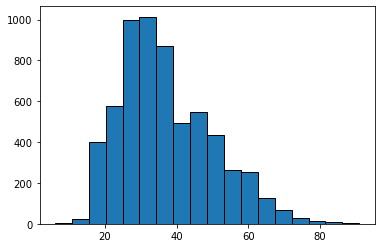

In [74]:
hist = plt.hist(mvt_df.age, bins=18, 
                edgecolor='black')
print(hist)

# Phân tích để trả lời các câu hỏi (tham khảo link dưới)

## https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

## 1. Black Americans are killed at a much higher rate than White Americans

- Tỉ lệ các chủng tộc bị bắn qua các năm, năm covid có thay đổi gì không. Qua đó cho tỉ lệ người mỹ đen bị bắn
nhiều hơn mỹ trắng

In [12]:



#population = np.array([197,43,60,19,5,4]) * 1000000
#race = pd.Series(population,index=['W','B','H','A','N','O'])
#population = np.array([60.3,13.4,18.5,5.9,1.3,0.6]) * 3.28
#race = pd.Series(population,index=['W','B','H','A','N','O'])
#race

 ### Dân số các chủng tốc ở mỹ hiện nay

In [13]:
population_ratio = np.array([60.3,13.4,18.5,5.9]) 
four_race_arr = ['W','B','H','A']
race_census = pd.Series(population_ratio * 3.28, index = four_race_arr,)
race_census

W    197.784
B     43.952
H     60.680
A     19.352
dtype: float64

<AxesSubplot:xlabel='race', ylabel='Population (million)'>

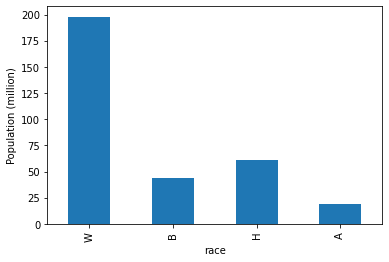

In [14]:
race_census.plot.bar(xlabel='race', ylabel= 'Population (million)')

### Số lượng người bị bắn theo chủng tộc

In [15]:
four_race_us = mvt_df[mvt_df.race.isin(four_race_arr)]
race_shootings = four_race_us.race.value_counts()
race_shootings

W    2903
B    1520
H    1062
A     104
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='person are killed'>

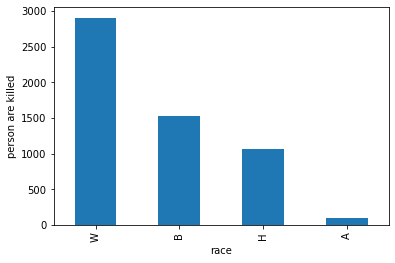

In [16]:
race_shootings.plot.bar(xlabel='race', ylabel= 'person are killed')

### Tỉ lệ người bị bắn trên 1 triệu người theo chủng tộc

In [17]:
s = (race_shootings / race_census).astype('int').sort_values()
s

A     5
W    14
H    17
B    34
dtype: int64

<AxesSubplot:xlabel='race', ylabel='Person killed per million'>

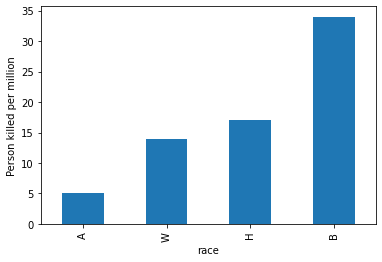

In [18]:
s.plot.bar(xlabel='race', ylabel= 'Person killed per million')

## 2.Trong mỗi năm của 3 năm gần đây, số lượng các vụ phạm tội thay đổi như thế nào theo tháng? (1đ)

In [65]:
mvt_df['year'] = mvt_df.date.dt.year
mvt_df['month'] = mvt_df.date.dt.month
mvt_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,6977,NaN,2021-06-28,shot,gun,NaN,M,NaN,Siskiyou County,CA,False,attack,Car,False,-122.192,41.635,True,2021,6
6415,6962,Philip Sanders,2021-06-29,shot,gun,32.0,M,NaN,Flour Bluff,TX,False,attack,Not fleeing,False,-97.295,27.679,True,2021,6
6416,6975,Larry Hunt,2021-06-29,shot,undetermined,58.0,M,NaN,Bayard,NE,False,undetermined,NaN,False,-103.322,41.752,True,2021,6
6417,6974,John Hayden Inabinet,2021-06-30,shot,unknown weapon,51.0,M,NaN,Calhoun County,SC,False,undetermined,NaN,False,-80.860,33.634,True,2021,6


In [70]:
s = mvt_df[['year','month']]
s = s.groupby(['year','month']).size()
num_thefts_each_month_df = s.unstack(1).T
num_thefts_each_month_df = num_thefts_each_month_df[[2018,2019,2020]]
num_thefts_each_month_df

year,2018,2019,2020
month,,,
1,99.0,93.0,88.0
2,80.0,72.0,78.0
3,109.0,88.0,93.0
4,98.0,71.0,79.0
5,83.0,74.0,111.0
6,81.0,86.0,77.0
7,89.0,80.0,68.0
8,74.0,86.0,87.0
9,55.0,78.0,59.0


<AxesSubplot:xlabel='Month', ylabel='NumThefts'>

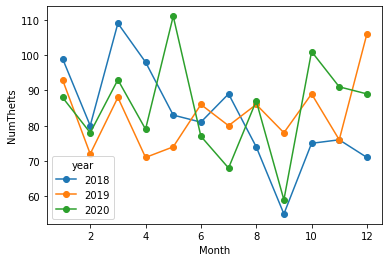

In [71]:
num_thefts_each_month_df.plot.line(xlabel = 'Month', ylabel = 'NumThefts', marker='o',)

In [22]:
#plt.rcParams["figure.figsize"] = (21,30)
#j = 2015
#for i in range(7):
 #   plt.subplot(7,1,i+1)
 #   num_thefts_each_month_df[j+i].plot.line(xlabel = 'Month', ylabel = 'NumThefts', marker='o')


## 3. Shootings happen across the country

- Các bang, vùng nào có tỷ lệ bắn nhiều nhất

- https://www.kaggle.com/aviral24/us-police-shooting

- https://databricks.com/blog/2020/11/16/fatal-force-exploring-police-shootings-with-sql-analytics.html

### Dân số các bang ở mỹ

In [23]:
#https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/
#https://github.com/databricks/tech-talks/tree/master/2020-12-10%20%7C%20Fatal%20Force:%20Exploring%20Police%20Shootings%20with%20SQL%20Analytics
f = pd.read_excel("state.xls",skiprows = 2, index_col = 'State')
d = f[f.FIPStxt % 1000 == 0].POP_ESTIMATE_2019.drop(labels = ['US','PR']).to_frame()
d = d.reset_index().rename(columns={'POP_ESTIMATE_2019': 'Population'})
d.head(10)

,State,Population
0,AL,4903185
1,AK,731545
2,AZ,7278717
3,AR,3017804
4,CA,39512223
5,CO,5758736
6,CT,3565287
7,DE,973764
8,DC,705749
9,FL,21477737


### Số lượng người bị bắn ở các bang

In [24]:
b = mvt_df.state.value_counts()
b = b.to_frame().reset_index()
b = b.rename(columns={'state': 'Total', 'index': 'State'})
b.head(10)

,State,Total
0,CA,948
1,TX,570
2,FL,421
3,AZ,298
4,CO,232
5,GA,231
6,OK,189
7,NC,182
8,OH,181
9,WA,176


### Tỷ lệ trên 1 triệu người ở các bang

In [25]:
ff = d.merge(b).set_index('State')
ff['ratio'] = (ff.Total / ff.Population * 1000000).astype('int')
ff = ff.sort_values(by='ratio', ascending=False)
ff.head(10)

,Population,Total,ratio
State,,,
AK,731545,45,61
NM,2096829,125,59
OK,3956971,189,47
AZ,7278717,298,40
CO,5758736,232,40
MT,1068778,39,36
NV,3080156,107,34
WV,1792147,60,33
AR,3017804,95,31
